#**Task 1: Add Gaussian Noise and Apply Otsu’s Algorithm**

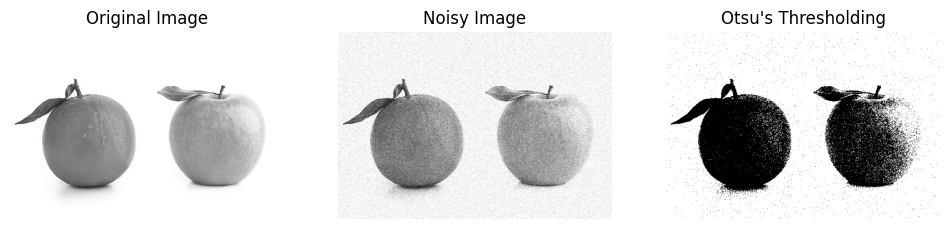

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request

# Read an existing grayscale image
url = 'https://media.istockphoto.com/id/637563258/photo/apple-and-orange-difference.jpg?s=612x612&w=0&k=20&c=rwcRKplMVecLJSpTT1j2hEkWN9xdmn4rLVE3K8iNr50='
resp = urllib.request.urlopen(url)
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('sample_data/image.jpg', 0)

# Add Gaussian noise
mean = 0
std = 25
gaussian = np.random.normal(mean, std, img.shape)
noisy_img = img + gaussian
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Apply Otsu's thresholding
_, otsu_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_img, cmap='gray')
plt.axis('off')

plt.show()

#**Task 2: Region Growing for Image Segmentation**

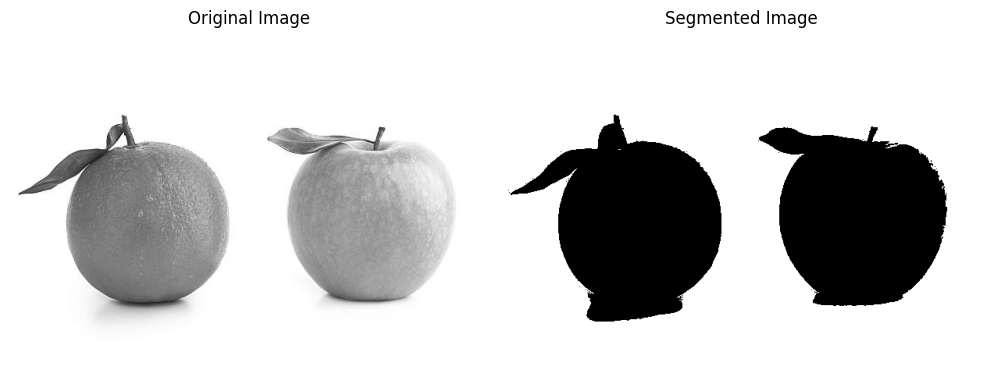

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from skimage import data

# Load the image
url = 'https://media.istockphoto.com/id/637563258/photo/apple-and-orange-difference.jpg?s=612x612&w=0&k=20&c=rwcRKplMVecLJSpTT1j2hEkWN9xdmn4rLVE3K8iNr50='
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('sample_data/image.jpg', 0)

# Region growing function
def region_growing(image, seeds, threshold):
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    for seed in seeds:
        queue = deque([seed])
        seed_value = image[seed]

        while queue:
            x, y = queue.popleft()
            if visited[x, y]:
                continue
            visited[x, y] = True

            # Check if pixel is within threshold
            if abs(int(image[x, y]) - int(seed_value)) <= threshold:
                segmented[x, y] = 255
                # Check neighbors
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                            if not visited[nx, ny]:
                                queue.append((nx, ny))
    return segmented

# Seeds and threshold
seeds = [(100, 100), (150, 150)]
threshold = 20

# Apply region growing
segmented_image = region_growing(img, seeds, threshold)

# Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()